In [23]:
# importing all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [24]:
car_dataset=pd.read_csv('car data.csv')

In [25]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
car_dataset.shape

(301, 9)

In [27]:
# getting some info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
# finding for any missing values presence
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# encoding the categorical data

In [38]:
# changing the Dtype of attributes from object to intergers
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [39]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [40]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [41]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [42]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [43]:
# splitting of data in testing and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

<!-- 1.Linear Regression -->

# linear regression

In [57]:
# model
model=LinearRegression()

In [45]:
# training the model
model.fit(x_train,y_train)

LinearRegression()

In [46]:
# evaluation of model
y_train_pred=model.predict(x_train)


In [47]:
#R squared error
score_1=metrics.r2_score(y_train,y_train_pred)

In [48]:
#mean absolute error
score_2=metrics.mean_absolute_error(y_train,y_train_pred)

In [49]:
print("R squared error:",score_1)
print("mean absolute error:", score_2)

R squared error: 0.8799451660493701
mean absolute error: 1.2166174093912077


# visualize actual prices and predicted prices


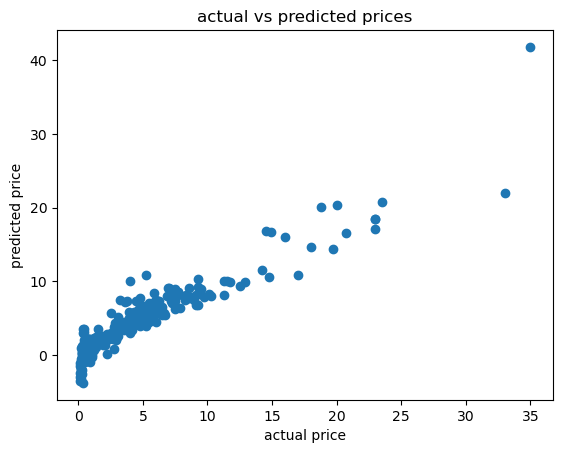

In [50]:
plt.scatter(y_train,y_train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted prices")
plt.show()

In [55]:
y_test_pred=model.predict(x_test)
#R squared error
score_1=metrics.r2_score(y_test,y_test_pred)
score_2=metrics.mean_absolute_error(y_test,y_test_pred)
print("r squared error :",score_1)
print("mean absolute error :",score_2)

r squared error : 0.836576671502687
mean absolute error : 1.1516382156614662


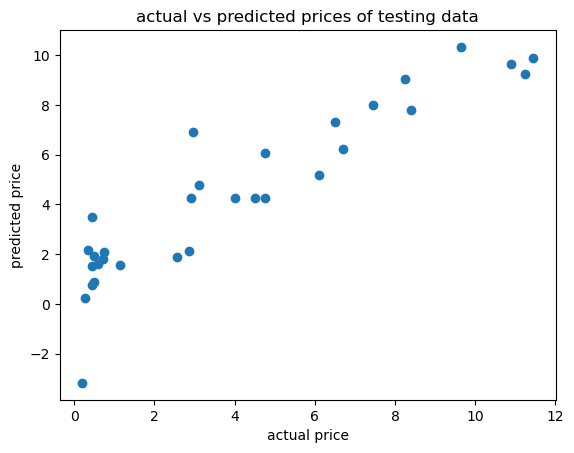

In [56]:
# visualizing the actual and predicted prices of testing data
plt.scatter(y_test,y_test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted prices of testing data")
plt.show()

# lasso regression

In [60]:
# model
lasso_model=Lasso()

In [61]:
lasso_model.fit(x_train,y_train)

Lasso()

In [70]:
# evaluation of model
y_train_pred_lasso=lasso_model.predict(x_train)

In [71]:
#R squared error
score_3=metrics.r2_score(y_train,y_train_pred_lasso)

In [72]:
#mean absolute error
score_4=metrics.mean_absolute_error(y_train,y_train_pred_lasso)

In [73]:
print("R squared error:",score_3)
print("mean absolute error:", score_4)

R squared error: 0.8427856123435794
mean absolute error: 1.2863097696916528


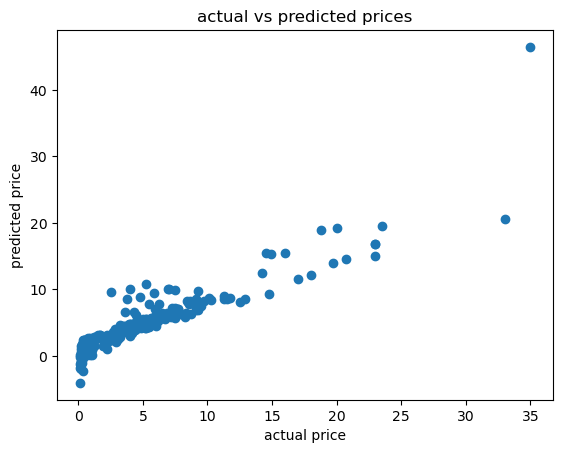

In [74]:
plt.scatter(y_train,y_train_pred_lasso)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted prices")
plt.show()

In [76]:
y_test_pred_lasso=lasso_model.predict(x_test)
#R squared error
score_3=metrics.r2_score(y_test,y_test_pred_lasso)
score_4=metrics.mean_absolute_error(y_test,y_test_pred_lasso)
print("r squared error :",score_3)
print("mean absolute error :",score_4)

r squared error : 0.8709167941173195
mean absolute error : 1.0507413774170433


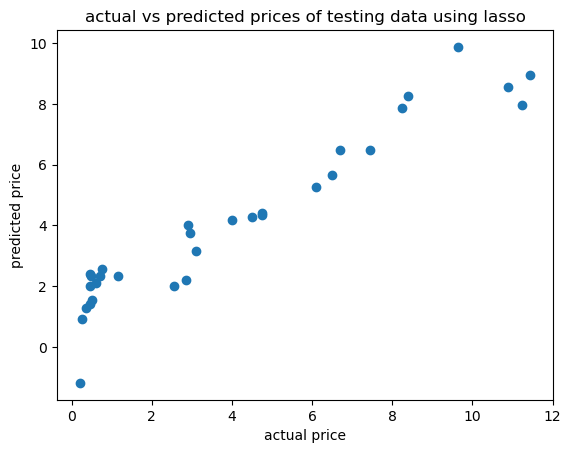

In [77]:
# visualizing the actual and predicted prices of testing data
plt.scatter(y_test,y_test_pred_lasso)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted prices of testing data using lasso")
plt.show()